   claim  coming   free  friend  hello   just    let  limited   meet  money  offer  party  prize  tomorrow    win
0  0.000   0.000  0.000   0.000  0.000  0.000  0.000    0.000  0.000  0.707  0.000  0.000  0.000     0.000  0.707
1  0.000   0.000  0.000   0.707  0.707  0.000  0.000    0.000  0.000  0.000  0.000  0.000  0.000     0.000  0.000
2  0.577   0.000  0.577   0.000  0.000  0.000  0.000    0.000  0.000  0.000  0.000  0.000  0.577     0.000  0.000
3  0.000   0.000  0.000   0.000  0.000  0.000  0.577    0.000  0.577  0.000  0.000  0.000  0.000     0.577  0.000
4  0.000   0.000  0.000   0.000  0.000  0.577  0.000    0.577  0.000  0.000  0.577  0.000  0.000     0.000  0.000
5  0.000   0.707  0.000   0.000  0.000  0.000  0.000    0.000  0.000  0.000  0.000  0.707  0.000     0.000  0.000

--- Model Coefficients (sorted by absolute effect) ---
coming          | Coef=-0.284 | Sign=-
friend          | Coef=-0.284 | Sign=-
hello           | Coef=-0.284 | Sign=-
money           | Coef=0.284 

You:  hello how are you


   claim  coming  free  friend  hello  just  let  limited  meet  money  offer  party  prize  tomorrow  win
0    0.0     0.0   0.0     0.0    1.0   0.0  0.0      0.0   0.0    0.0    0.0    0.0    0.0       0.0  0.0
--------------------------------------------------------------------------------

--- Quick Prediction ---
Prediction: NOT SPAM ✅
Probability (from predict_proba): 0.430

--- Detailed Analysis ---
hello           | TF-IDF=1.000 | Coef=-0.284 | Contribution=-0.284

Formula for z: z = 0.000 + (-0.284*1.000)
z = -0.284
p = sigmoid(z) = 0.430
Detailed Prediction: NOT SPAM ✅


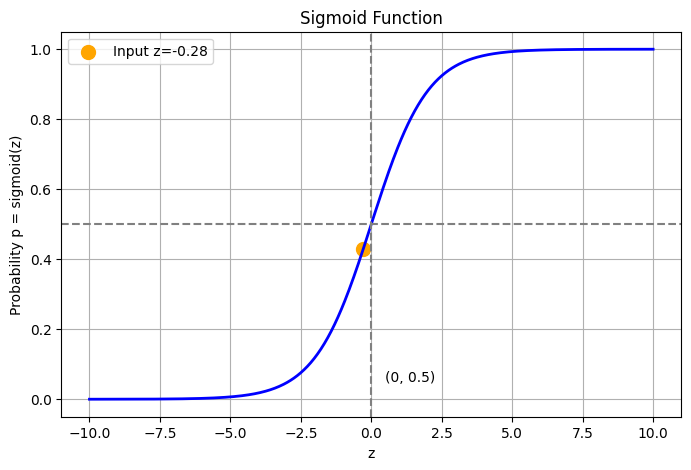

--------------------------------------------------


You:  asdasd


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from termcolor import colored
import matplotlib.pyplot as plt

# --- داده آموزشی ---
texts = [
    "Win money now",
    "Hello friend how are you",
    "Claim your free prize",
    "Let's meet tomorrow",
    "Limited offer just for you",
    "Are you coming to the party"
]
labels = [1, 0, 1, 0, 1, 0]

# --- آموزش TF-IDF و مدل ---
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(texts)
# نمایش ماتریس X به صورت جدول
# تنظیم برای نمایش همه ستون‌ها در یک خط
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(df.round(3))



model = LogisticRegression(max_iter=1000)
model.fit(X, labels)

# --- جدول ضرایب مدل ---
words = vectorizer.get_feature_names_out()
coef_values = model.coef_[0]

df_coefs = pd.DataFrame({
    "Word": words,
    "Coef": coef_values
})
df_coefs["Sign"] = df_coefs["Coef"].apply(lambda x: "+" if x>0 else "-")
df_coefs["Abs_Coef"] = df_coefs["Coef"].abs()
df_coefs = df_coefs.sort_values(by="Abs_Coef", ascending=False)

print("\n--- Model Coefficients (sorted by absolute effect) ---")
for _, row in df_coefs.iterrows():
    word, coef, sign = row["Word"], row["Coef"], row["Sign"]
    color = "red" if coef>0 else "cyan"
    print(colored(f"{word:15s} | Coef={coef:.3f} | Sign={sign}", color))

# intercept
b0 = model.intercept_[0]
print(f"\nIntercept (b0) = {b0:.3f}")

# --- معادله کلی ---
print("\n--- Logistic Regression Equation ---")
equation = f"z = {b0:.3f}"
for j, word in enumerate(words):
    equation += f" + ({coef_values[j]:.3f} * x_{word})"
print(equation)

# --- تابع سیگموید ---
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# --- آماده‌سازی نمودار سیگموید ---
z_range = np.linspace(-10, 10, 500)
p_range = sigmoid(z_range)
plt.figure(figsize=(8,5))
plt.plot(z_range, p_range, color='blue', linewidth=2)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("Probability p = sigmoid(z)")
plt.grid(True)
plt.axhline(0.5, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.text(0.5, 0.05, "(0, 0.5)", color='black')

# --- Chatbot loop ---
print("\nChatbot ready! Type 'quit' to exit.\n")
while True:
    user_input = input("You: ")
    if user_input.lower() == "quit":
        print("Chatbot: Goodbye!")
        break

    # تبدیل ورودی به TF-IDF
    X_new = vectorizer.transform([user_input])
    # نمایش ماتریس X به صورت جدول
    # تنظیم برای نمایش همه ستون‌ها در یک خط
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 200)
    df = pd.DataFrame(X_new.toarray(), columns=vectorizer.get_feature_names_out())
    print(df.round(3))
    print("-"*80)



    # --- Quick Prediction ---
    pred_label = model.predict(X_new)[0]
    pred_prob = model.predict_proba(X_new)[0,1]
    print("\n--- Quick Prediction ---")
    print(f"Prediction: {colored('SPAM 🚨','red') if pred_label==1 else colored('NOT SPAM ✅','green')}")
    print(f"Probability (from predict_proba): {pred_prob:.3f}")


    # --- Detailed Analysis ---
    print("\n--- Detailed Analysis ---")
    new_tfidf = X_new.toarray()[0]
    z = b0
    z_parts = [f"{b0:.3f}"]
    rows = []
    for j, word in enumerate(words):
        value = new_tfidf[j]
        if value > 0:
            contrib = coef_values[j]*value
            rows.append([word, round(value,3), round(coef_values[j],3), round(contrib,3)])
            z += contrib
            z_parts.append(f"({coef_values[j]:.3f}*{value:.3f})")

    p = sigmoid(z)
    df_analysis = pd.DataFrame(rows, columns=["Word","TF-IDF","Coef","Contribution"])

    # نمایش جدول با رنگ
    for _, row in df_analysis.iterrows():
        word, tfidf, coef, contrib = row
        color = "red" if contrib>0 else "cyan"
        print(colored(f"{word:15s} | TF-IDF={tfidf:.3f} | Coef={coef:.3f} | Contribution={contrib:.3f}", color))

    # نمایش فرمول z مرحله به مرحله
    z_formula = " + ".join(z_parts)
    print(f"\nFormula for z: z = {z_formula}")
    print(f"z = {z:.3f}")
    print(f"p = sigmoid(z) = {p:.3f}")
    print("Detailed Prediction:", colored("SPAM 🚨","red") if p>=0.5 else colored("NOT SPAM ✅","green"))

    # --- رسم نقطه z ورودی روی نمودار سیگموید ---
    plt.scatter(z, p, color='orange', s=100, label=f"Input z={z:.2f}")
    plt.legend()
    plt.show()
    print("-"*50)
